In [102]:
import pandas as pd
import numpy as np

# Load your application data with Pandas
df = pd.read_csv('C:/Users/96655/Desktop/riyadh_resturants_clean.csv')
df['rating'] = df['rating'].fillna(0)
df['ratingSignals'] = df['ratingSignals'].fillna(0)
df['likes'] = df['likes'].fillna(0)
df['photos'] = df['photos'].fillna(0)
df['tips'] = df['tips'].fillna(0)

df

,name,categories,address,lat,lng,price,likes,photos,tips,rating,ratingSignals
0,مطعم وقت الشواية,Afghan Restaurant,"الرياض 14723, المملكة العربية السعودية",24.518983,46.656981,Moderate,0.0,0,0,0.0,0.0
1,ديوانية عكاظ,Café,"الرياض 14726, المملكة العربية السعودية",24.518511,46.669149,Cheap,0.0,2,0,0.0,0.0
2,شاهي جمر راعي الجمس,Coffee Shop,"الرياض 14726, المملكة العربية السعودية",24.519314,46.670041,Cheap,0.0,0,0,0.0,0.0
3,غدير الشام,Afghan Restaurant,المملكة العربية السعودية,24.519520,46.671660,Moderate,0.0,0,0,0.0,0.0
4,Dunkin',Donut Shop,"الرياض, المملكة العربية السعودية",24.525001,46.433944,Cheap,29.0,90,1,8.9,32.0
...,...,...,...,...,...,...,...,...,...,...,...
19356,Tav restaurant,Halal Restaurant,المملكة العربية السعودية,24.939902,46.715187,NaN,0.0,0,0,0.0,0.0
19357,First Time,Coffee Shop,"الرياض 13455, المملكة العربية السعودية",24.942522,46.712326,Cheap,1.0,0,0,0.0,0.0
19358,شاورمو,Fast Food Restaurant,"الرياض, المملكة العربية السعودية",24.941936,46.712764,Cheap,0.0,2,0,0.0,0.0
19359,MammaRoti cafe,Café,"King khaled international airport, الرياض, الم...",24.942363,46.712423,Cheap,11.0,14,2,6.1,17.0


In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

In [104]:
df.columns

Index(['name', 'categories', 'address', 'lat', 'lng', 'price', 'likes',
       'photos', 'tips', 'rating', 'ratingSignals'],
      dtype='object')

In [105]:
df.columns = df.columns.map(str.strip)
df.columns

Index(['name', 'categories', 'address', 'lat', 'lng', 'price', 'likes',
       'photos', 'tips', 'rating', 'ratingSignals'],
      dtype='object')

In [106]:
# How many rows and columns does the dataset have?
df.shape

(19361, 11)

In [107]:
# View the correlations
df.corr()

,lat,lng,likes,photos,tips,rating,ratingSignals
lat,1.000000,0.114489,0.050482,0.054977,0.050642,0.082502,0.052854
lng,0.114489,1.000000,-0.054159,-0.064999,-0.057502,-0.040003,-0.056567
likes,0.050482,-0.054159,1.000000,0.795005,0.922807,0.297479,0.989933
photos,0.054977,-0.064999,0.795005,1.000000,0.711060,0.234264,0.793533
tips,0.050642,-0.057502,0.922807,0.711060,1.000000,0.295969,0.947834
rating,0.082502,-0.040003,0.297479,0.234264,0.295969,1.000000,0.308505
ratingSignals,0.052854,-0.056567,0.989933,0.793533,0.947834,0.308505,1.000000


In [108]:
ddf=df[['price','likes','categories']]
#ddf=ddf.groupby(['price','categories'])
ddf

,price,likes,categories
0,Moderate,0.0,Afghan Restaurant
1,Cheap,0.0,Café
2,Cheap,0.0,Coffee Shop
3,Moderate,0.0,Afghan Restaurant
4,Cheap,29.0,Donut Shop
...,...,...,...
19356,NaN,0.0,Halal Restaurant
19357,Cheap,1.0,Coffee Shop
19358,Cheap,0.0,Fast Food Restaurant
19359,Cheap,11.0,Café


In [109]:
heatmap1=pd.pivot_table(ddf,values='likes',index='categories',columns='price')

<AxesSubplot:xlabel='price', ylabel='categories'>

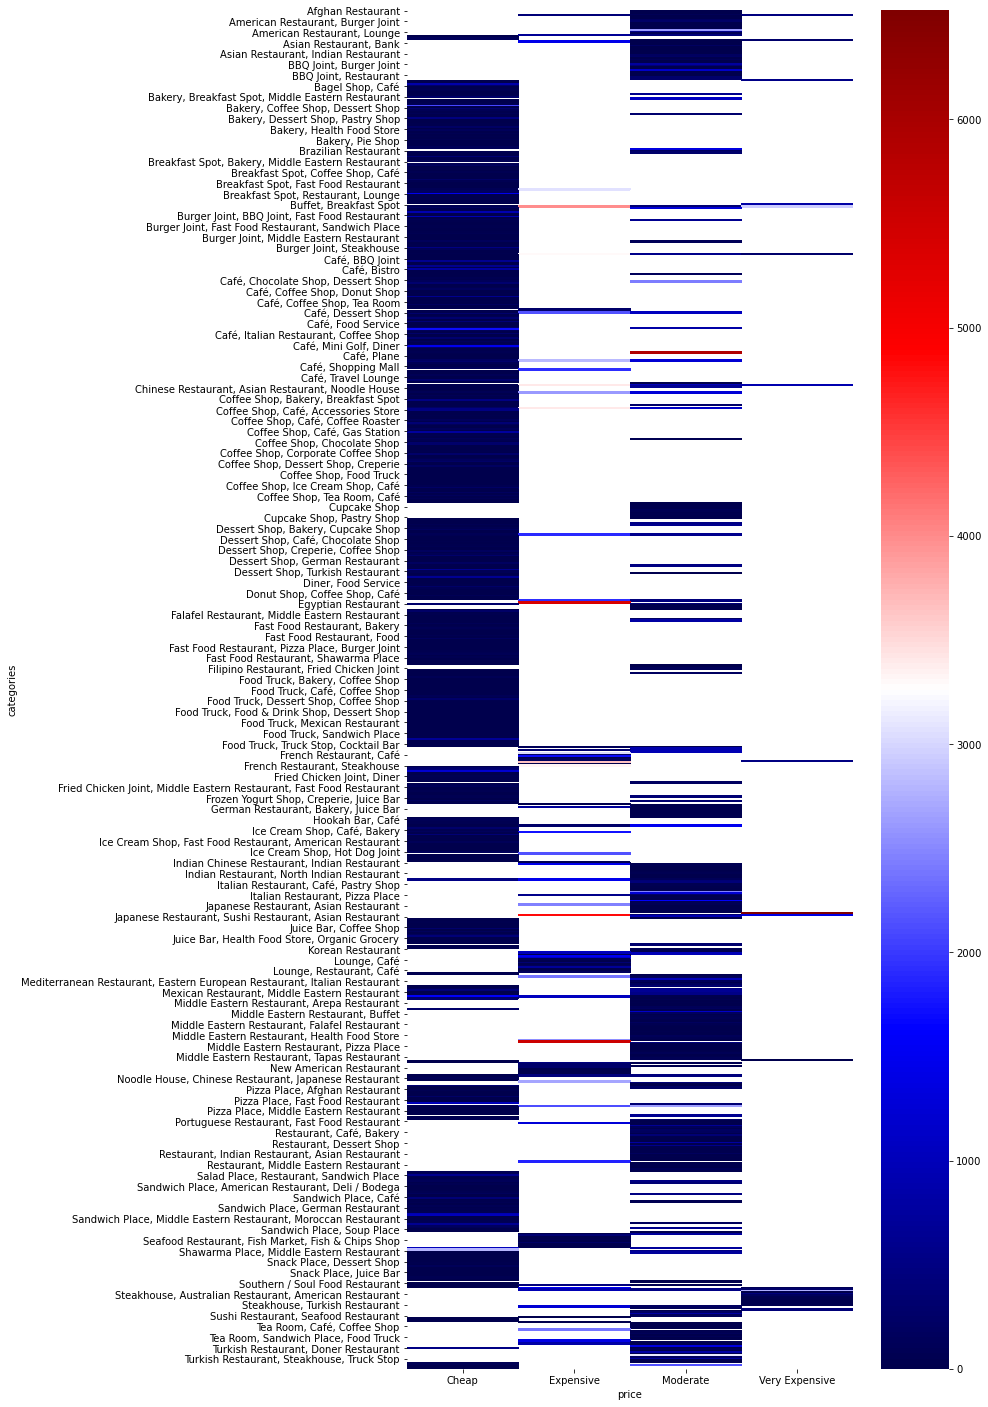

In [110]:
plt.figure(figsize=(10,25))
sns.heatmap(heatmap1, cmap="seismic")

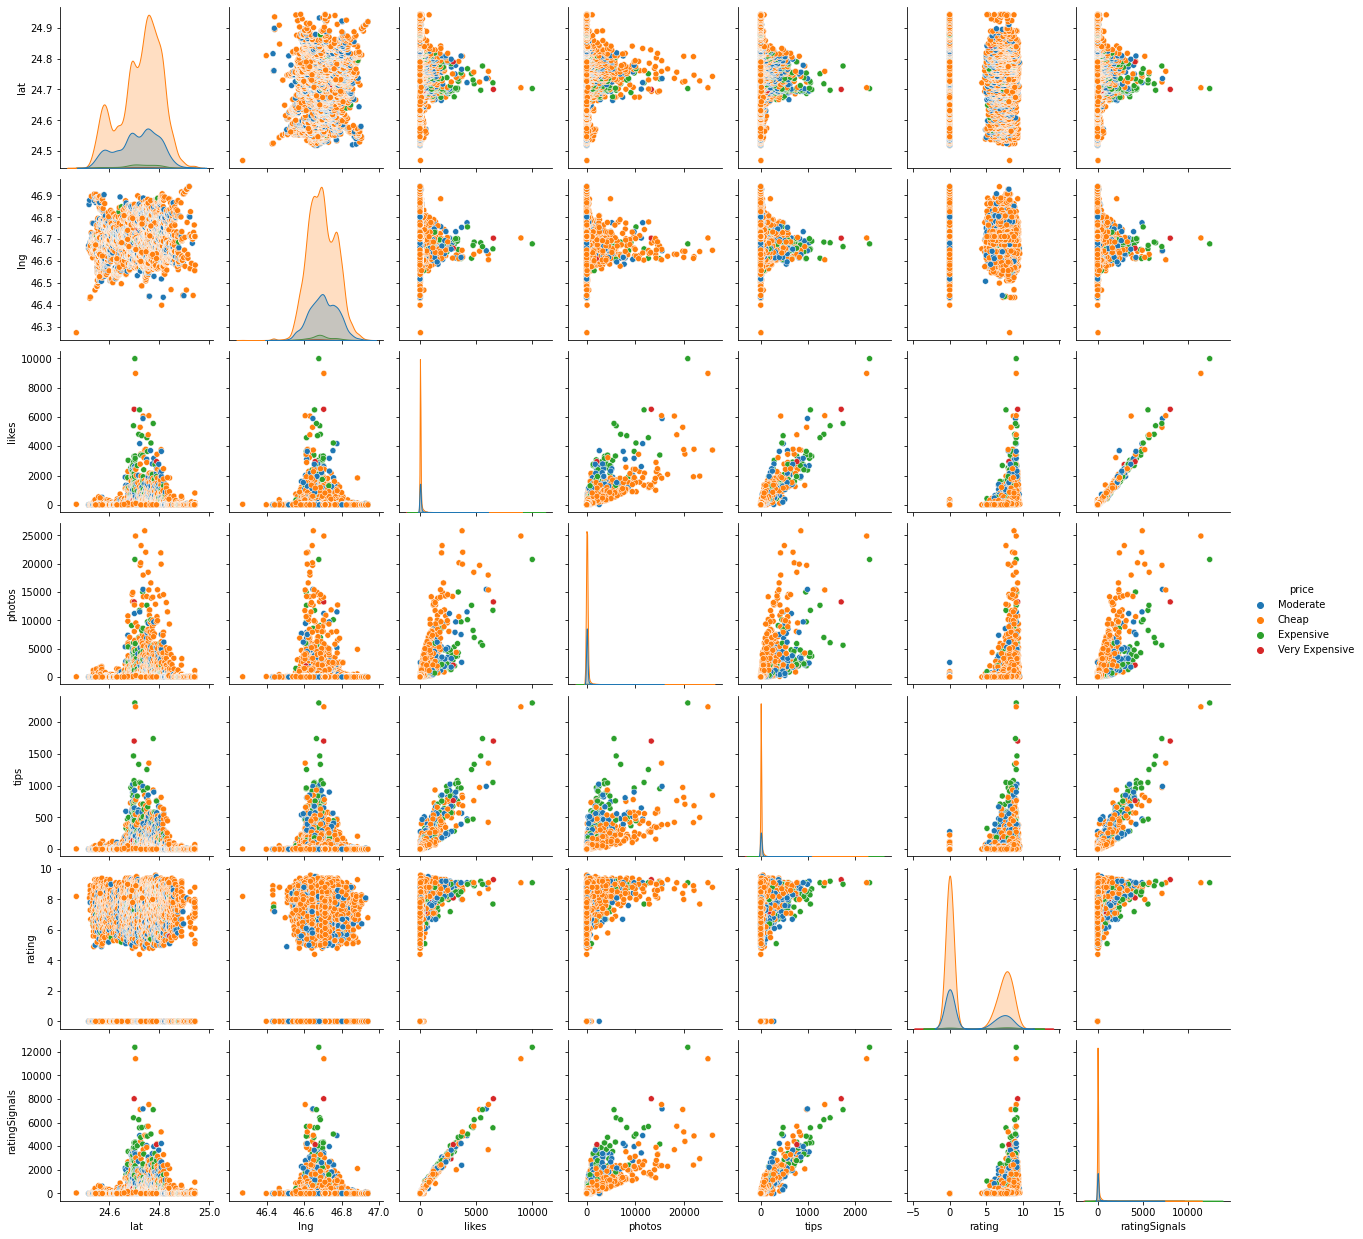

In [111]:
sns.pairplot(df, hue='price');

In [112]:
count = df['price'].value_counts()
display(count)

Cheap             13499
Moderate           3981
Expensive           303
Very Expensive       63
Name: price, dtype: int64

In [113]:
count = df['categories'].value_counts()
display(count)

Coffee Shop                            2110
Café                                   1882
Middle Eastern Restaurant               986
Dessert Shop                            823
Fast Food Restaurant                    798
                                       ... 
Pastry Shop, Halal Restaurant             1
Diner, Steakhouse                         1
Chocolate Shop, Café                      1
Diner, Sandwich Place, Food Service       1
Caucasian Restaurant                      1
Name: categories, Length: 1130, dtype: int64

In [130]:
df['photos']=df['photos'].astype(float)
df['tips']=df['tips'].astype(float)
df2=df.copy()
df["price"] = df["price"].astype("|S")
df['likes']=df['likes'].astype('int64')

df.info()
  
# print bar graph
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19361 entries, 0 to 19360
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           19361 non-null  object 
 1   categories     19361 non-null  object 
 2   address        19361 non-null  object 
 3   lat            19361 non-null  float64
 4   lng            19361 non-null  float64
 5   price          19361 non-null  |S14   
 6   likes          19361 non-null  int64  
 7   photos         19361 non-null  float64
 8   tips           19361 non-null  float64
 9   rating         19361 non-null  float64
 10  ratingSignals  19361 non-null  float64
dtypes: bytes112(1), float64(6), int64(1), object(3)
memory usage: 1.7+ MB


<Figure size 432x288 with 0 Axes>

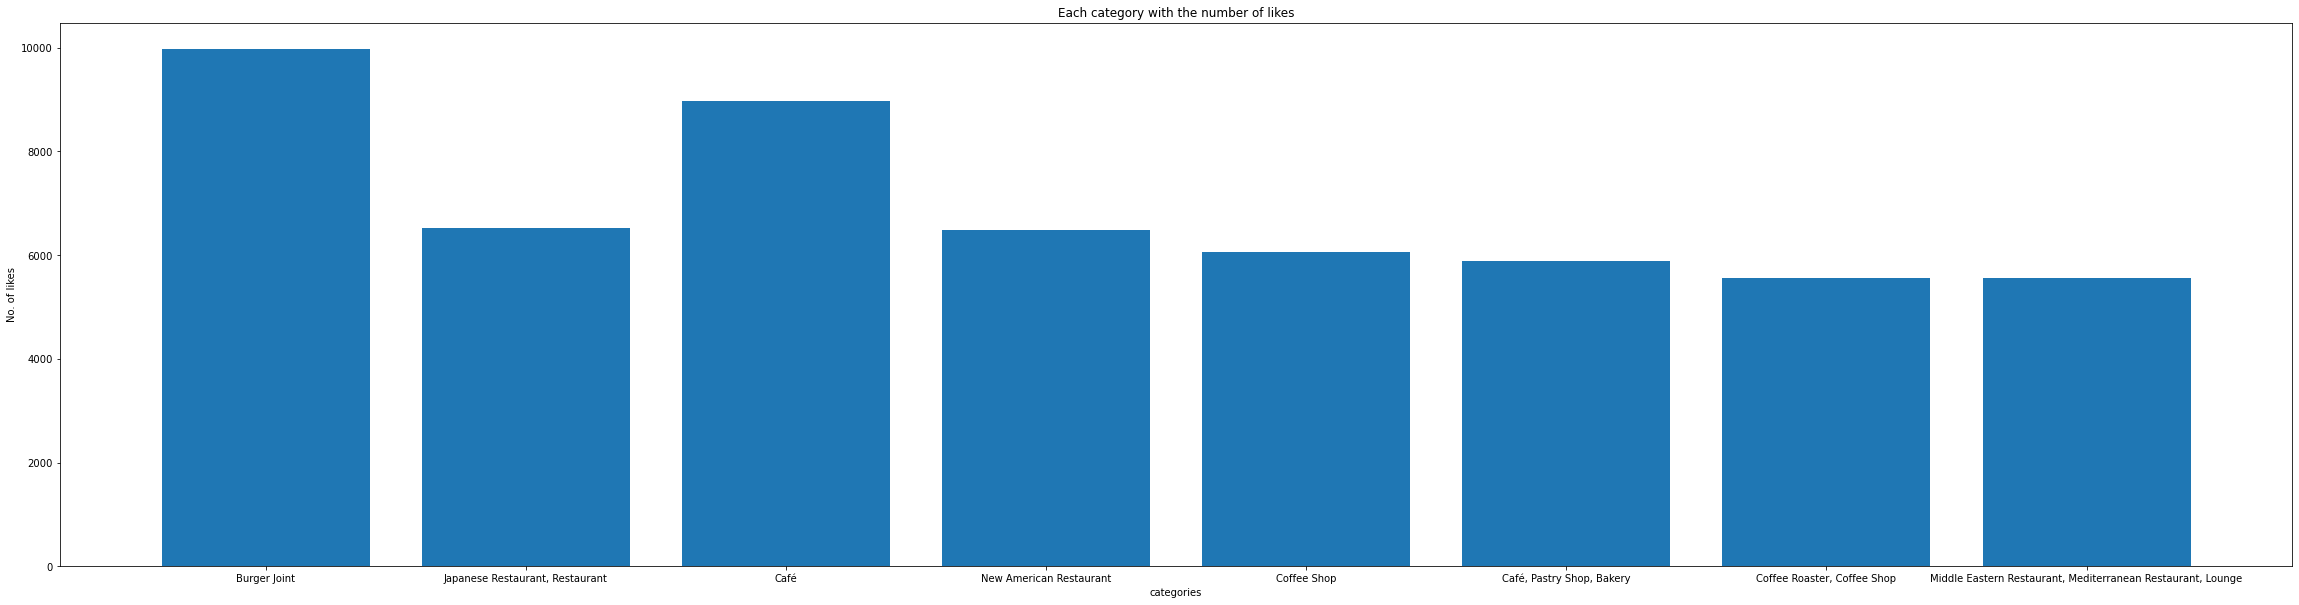

In [121]:
fig = plt.figure()
#categories = df['categories']
df1=df.copy()
df1.drop(df[df.likes < 5500].index, inplace=True)
likes = df1['likes']
categories = df1['categories']
plt.figure(figsize=(40, 10))  # width:20, height:3
plt.bar(categories,likes)
plt.xlabel("categories")
plt.ylabel("No. of likes")
plt.title("Each category with the number of likes")
plt.show()

<Figure size 720x1800 with 0 Axes>

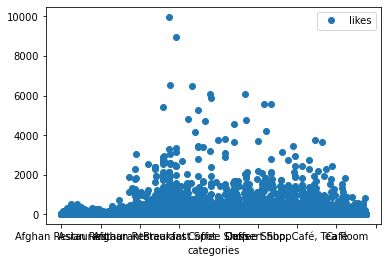

In [138]:

df.plot('categories','likes',style='o')
plt.show()

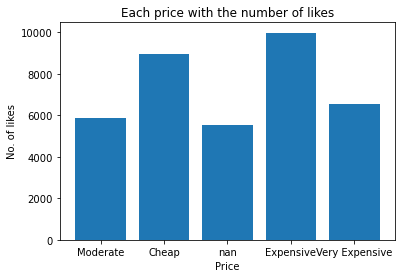

In [122]:
fig = plt.figure()
price = df['price']
likes = df['likes']
plt.bar(price,likes)
plt.xlabel("Price")
plt.ylabel("No. of likes")
plt.title("Each price with the number of likes")
plt.show()

<Figure size 720x1800 with 0 Axes>

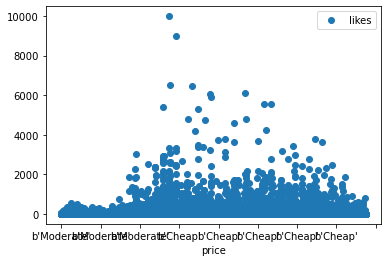

In [133]:
df.plot('price','likes',style='o')
plt.show()

<Figure size 640x480 with 0 Axes>

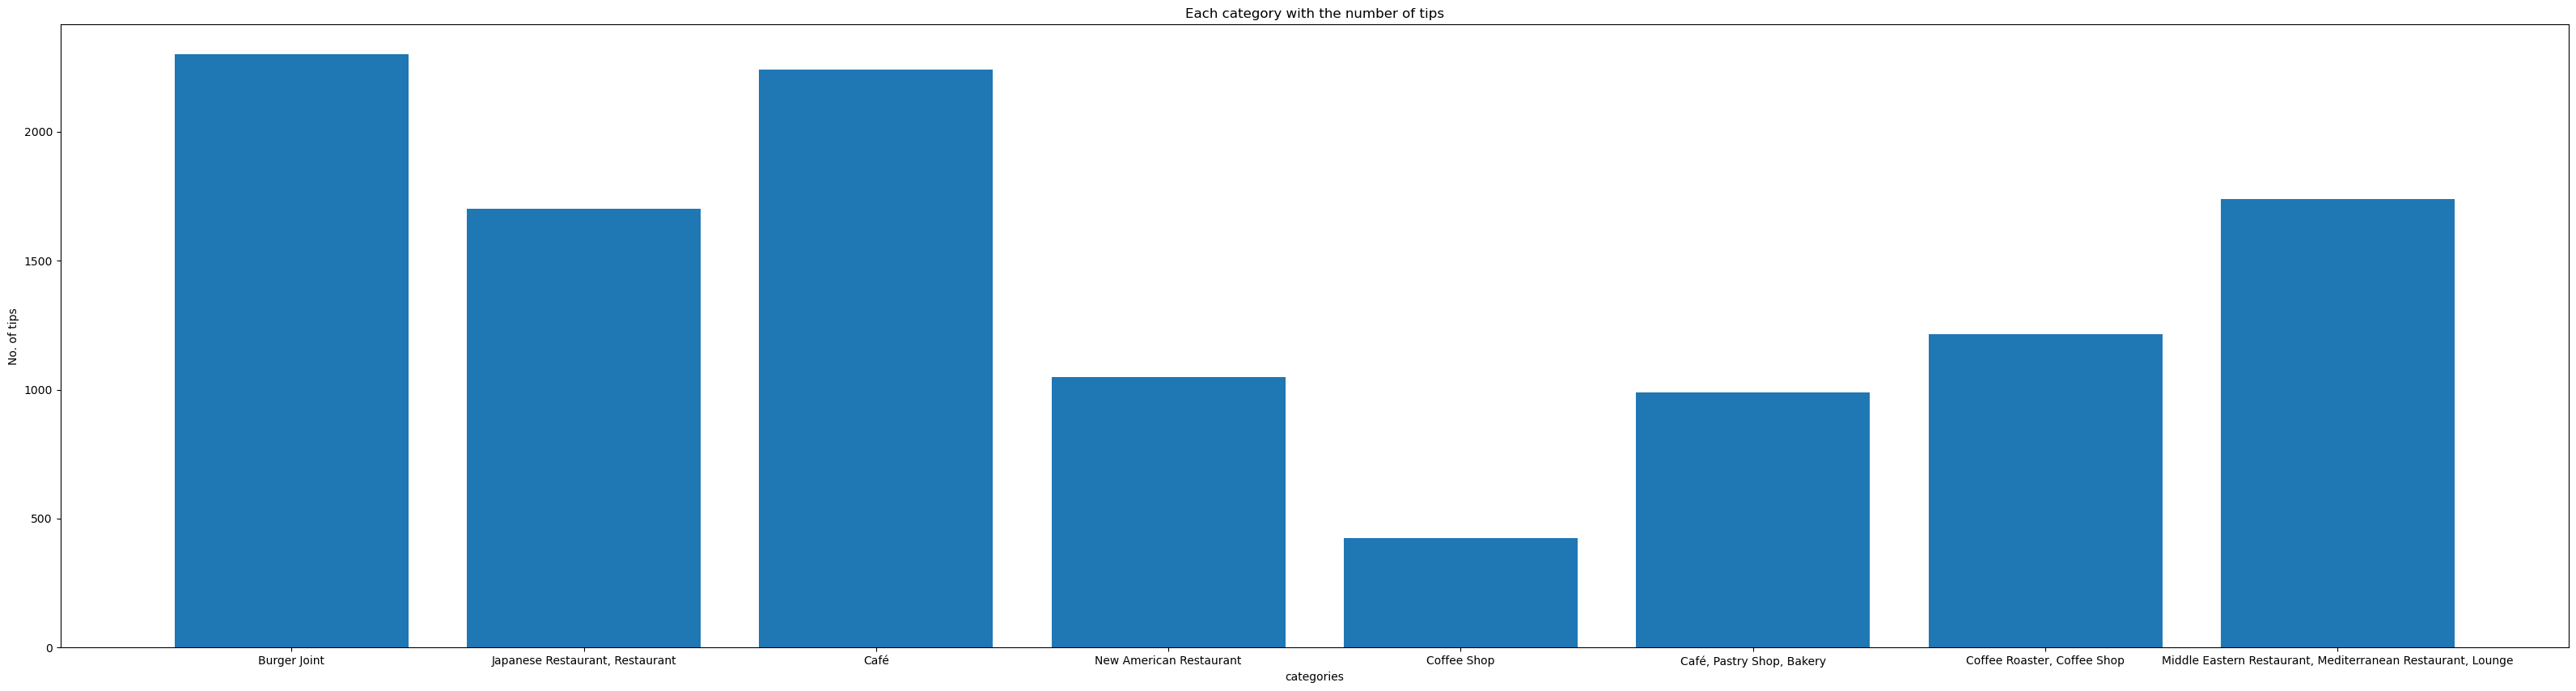

In [209]:
fig = plt.figure()
categories = df['categories']
df2=df.copy()
df2.drop(df[df.tips < 2000].index, inplace=True)
tips = df1['tips']
plt.figure(figsize=(40, 10))  # width:20, height:3
plt.bar(categories,tips)
plt.xlabel("categories")
plt.ylabel("No. of tips")
plt.title("Each category with the number of tips")
plt.show()

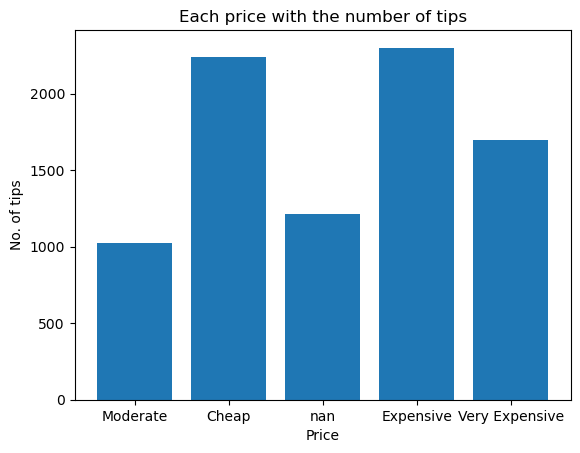

In [68]:
fig = plt.figure()
price = df['price']
tips = df['tips']
plt.bar(price,tips)
plt.xlabel("Price")
plt.ylabel("No. of tips")
plt.title("Each price with the number of tips")
plt.show()

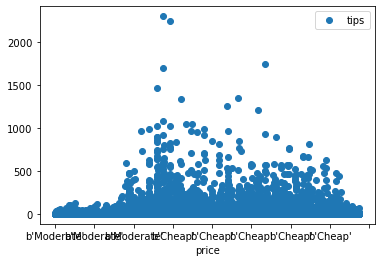

In [135]:
df.plot('price','tips',style='o')
plt.show()

<Figure size 640x480 with 0 Axes>

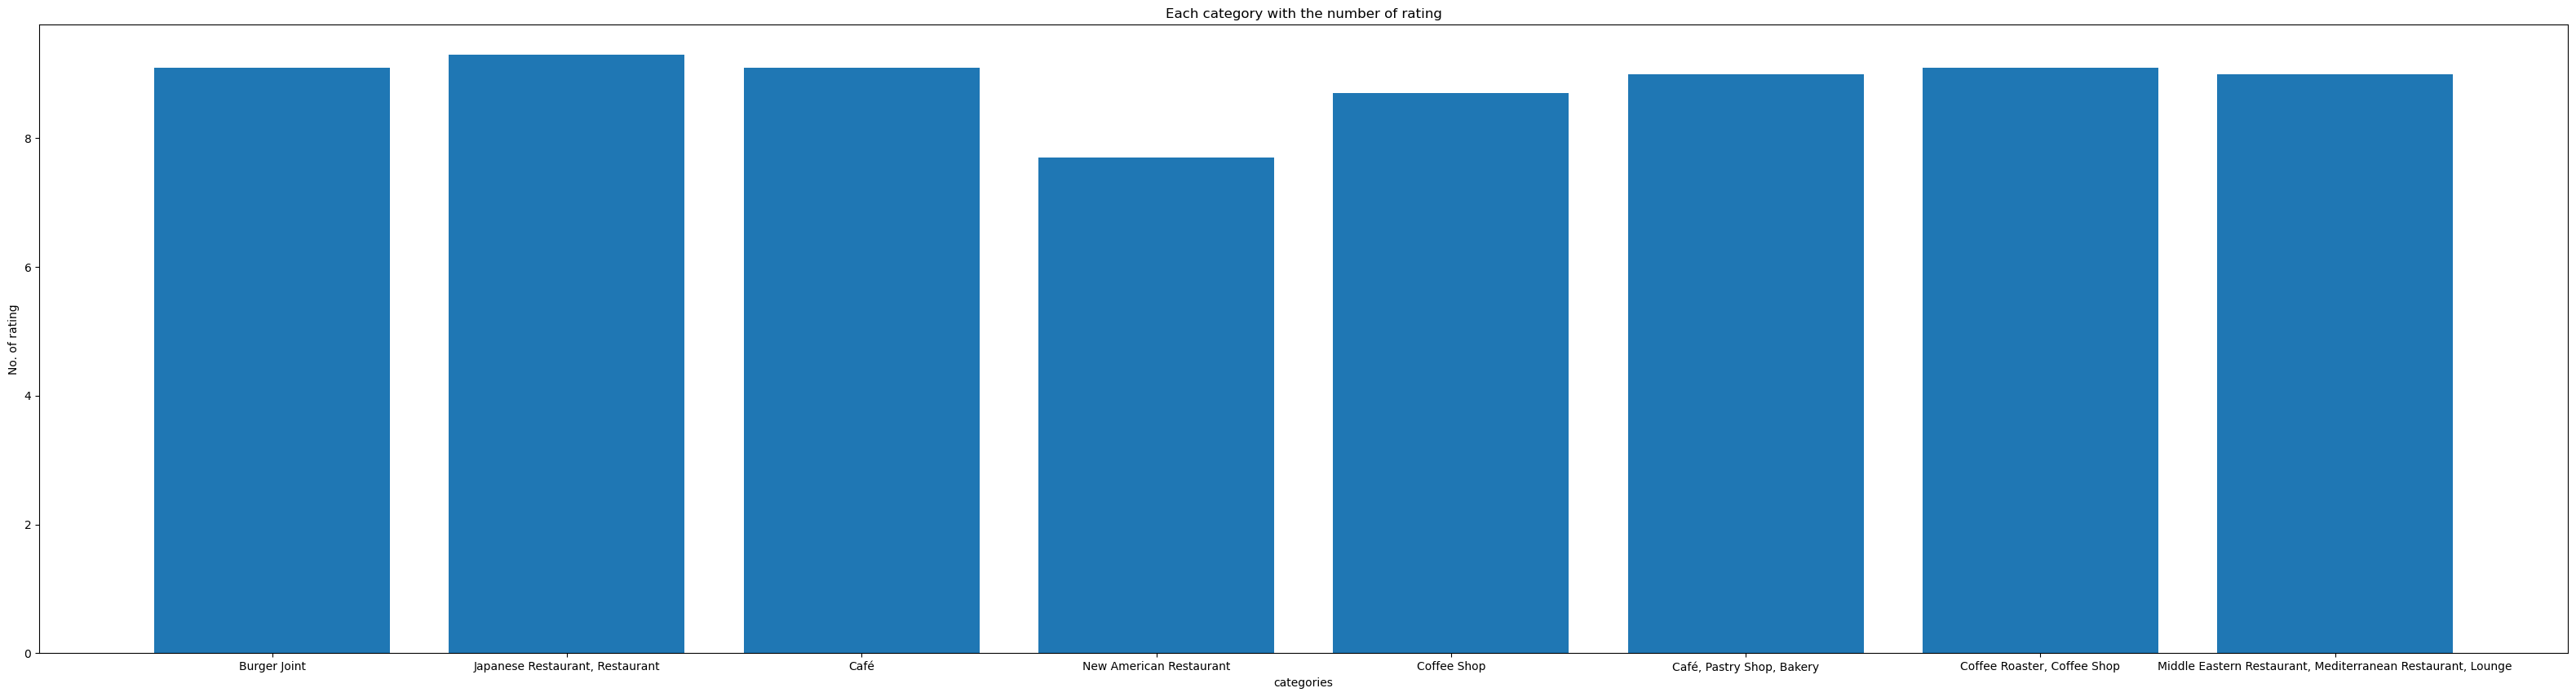

In [210]:
fig = plt.figure()
categories = df['categories']
df3=df.copy()
df3.drop(df[df.rating < 2000].index, inplace=True)
rating = df1['rating']
plt.figure(figsize=(40, 10))  # width:20, height:3
plt.bar(categories,rating)
plt.xlabel("categories")
plt.ylabel("No. of rating")
plt.title("Each category with the number of rating")
plt.show()

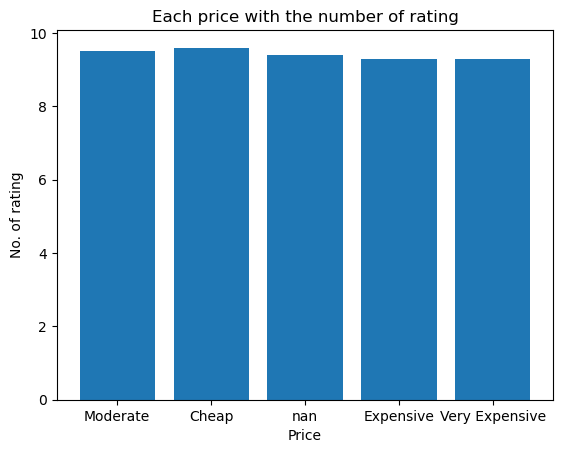

In [69]:
fig = plt.figure()
price = df['price']
rating = df['rating']
plt.bar(price,rating)
plt.xlabel("Price")
plt.ylabel("No. of rating")
plt.title("Each price with the number of rating")
plt.show()

<Figure size 640x480 with 0 Axes>

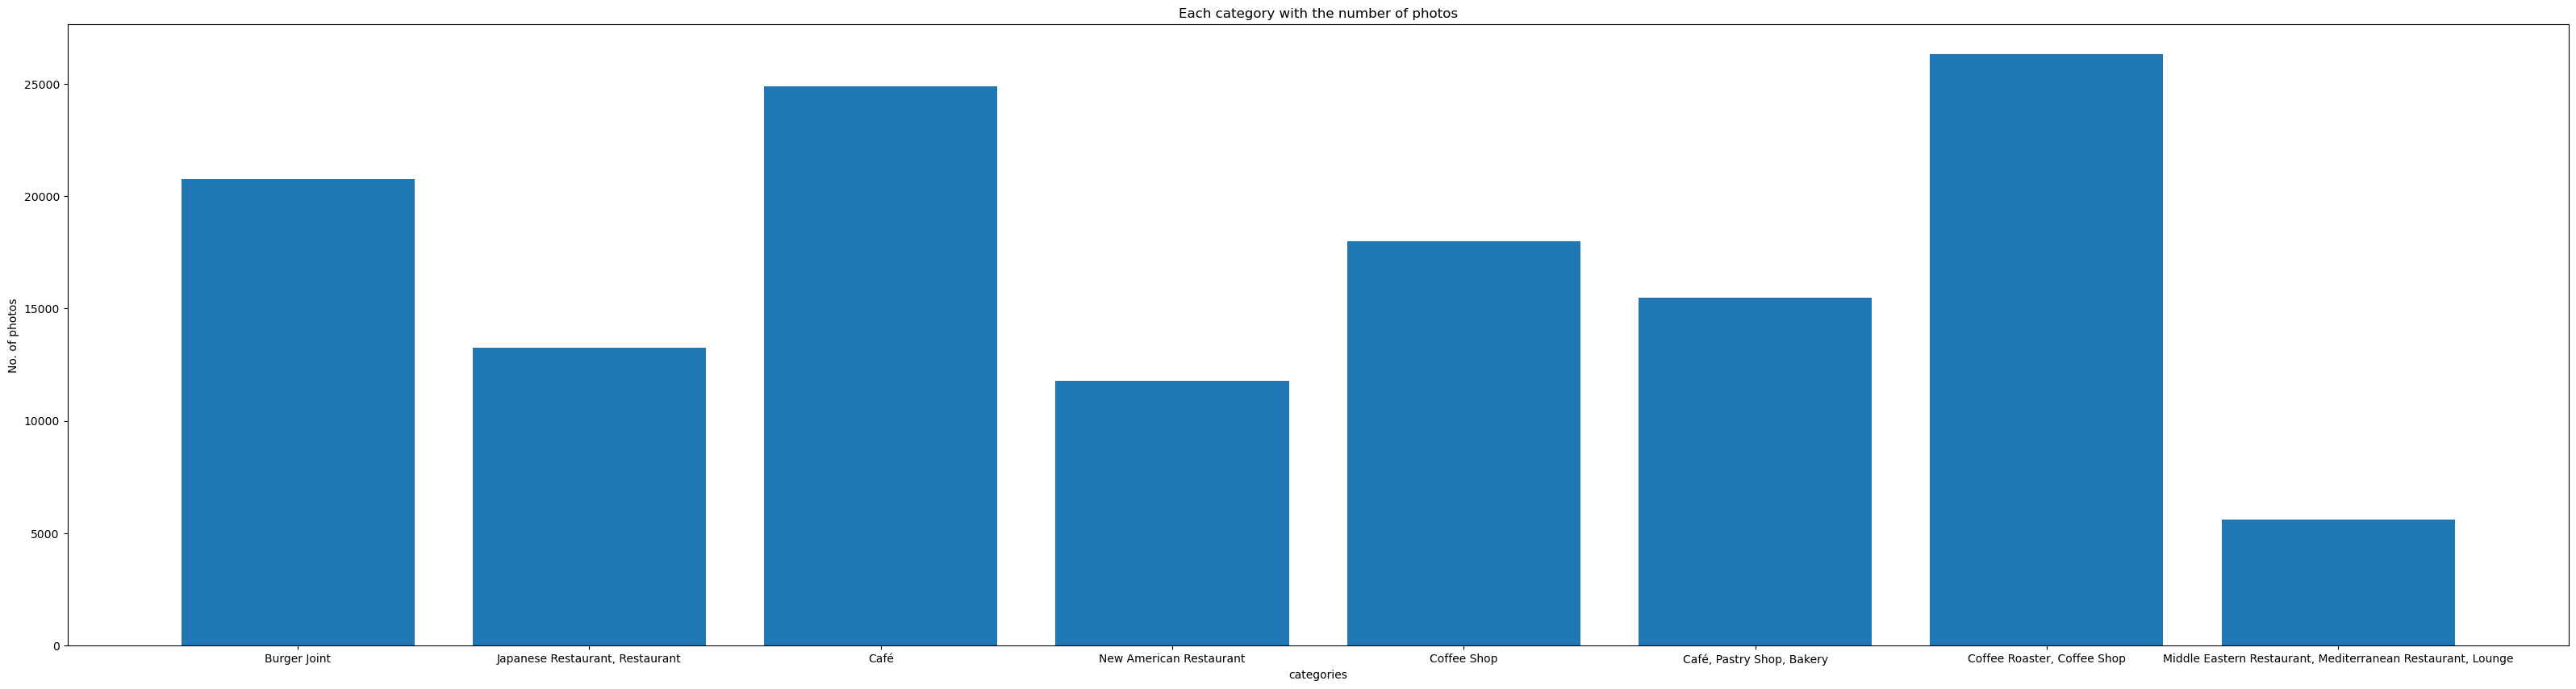

In [211]:
fig = plt.figure()
categories = df['categories']
df4=df.copy()
df4.drop(df[df.photos < 2000].index, inplace=True)
photos = df1['photos']
plt.figure(figsize=(40, 10))  # width:20, height:3
plt.bar(categories,photos)
plt.xlabel("categories")
plt.ylabel("No. of photos")
plt.title("Each category with the number of photos")
plt.show()

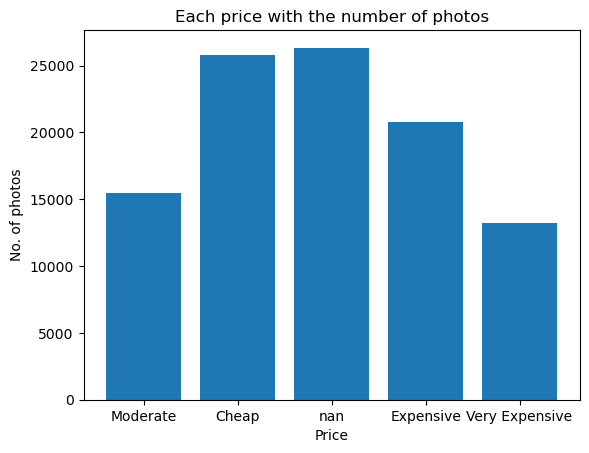

In [70]:
fig = plt.figure()
price = df['price']
photos = df['photos']
plt.bar(price,photos)
plt.xlabel("Price")
plt.ylabel("No. of photos")
plt.title("Each price with the number of photos")
plt.show()

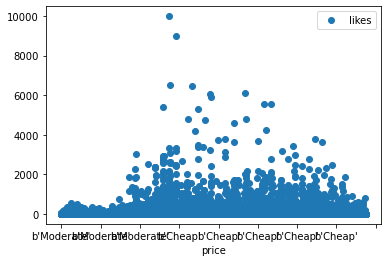

In [137]:
df.plot('price','likes',style='o')
plt.show()

In [13]:

!pip install geopandas

Could not fetch URL https://pypi.org/simple/geopandas/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/geopandas/ (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:1125)'))) - skipping


ERROR: Could not find a version that satisfies the requirement geopandas
ERROR: No matching distribution found for geopandas


In [16]:
import geopandas as gpd
from shapely.geometry import Point


# Convert it to a GeoDataFrame by transforming the Latitude/Longitude coordinates 
loc_crs = {'init': 'epsg:4326'}
loc_geom = [Point(xy) for xy in zip(df['lng'], df['lat'])]
geo_df = gpd.GeoDataFrame(df, crs=loc_crs, geometry=loc_geom)

# Plot the GeoDataFrame
geo_df.plot()

ModuleNotFoundError: No module named 'geopandas'